In [2]:
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [3]:
image_path = "./california_dreamin.jpg"

In [14]:
def showimg(img):
    # cv2 images are in bgr by default and IPython assumes RGB for display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis("off")
    #display(Image.fromarray(img_rgb))

def showgray(img_gray):
    plt.imshow(img_gray, cmap= "gray")
    plt.axis("off")

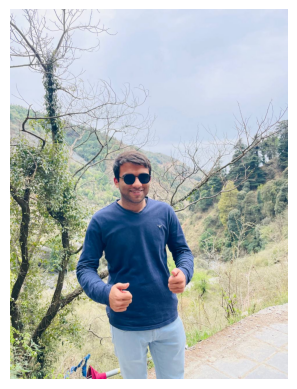

In [15]:
img0 = cv2.imread(image_path)
showimg(img0)

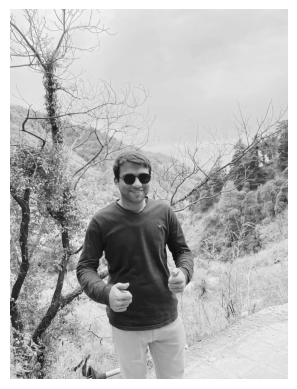

In [16]:
img0g = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
showgray(img0g)

# Morphological Tranformations on Gray Image
## Erosion, Dilation, and Morphological Gradient

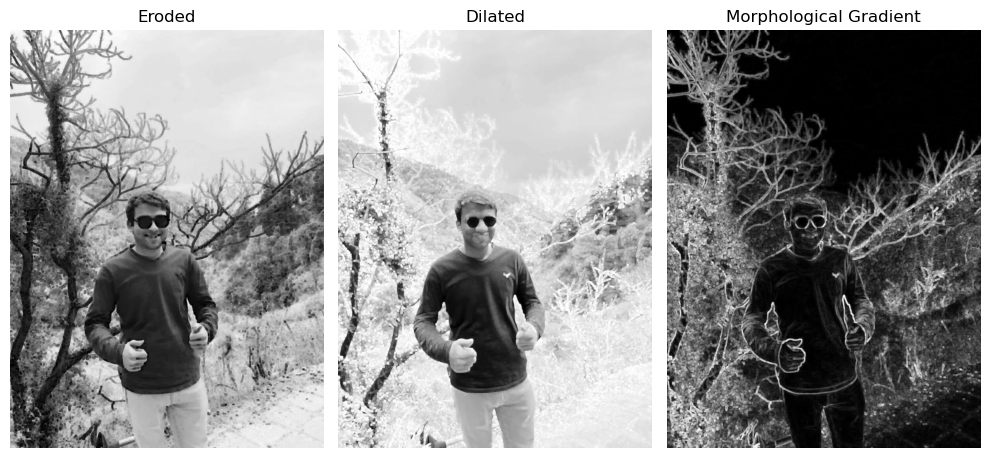

In [34]:
kernel = np.ones((5, 5), np.uint8)
eroded = cv2.erode(img0g, kernel, iterations = 1)

plt.figure(figsize = (10, 20))

plt.subplot(1, 3, 1)
plt.imshow(eroded, cmap = "gray")
plt.title('Eroded')
plt.axis("off")

dilated = cv2.dilate(img0g, kernel, iterations = 1)
plt.subplot(1, 3, 2)
plt.imshow(dilated, cmap = "gray")
plt.title('Dilated')
plt.axis("off")

morphological_gradient = cv2.subtract(dilated, eroded)
plt.subplot(1, 3, 3)
plt.imshow(morphological_gradient, cmap = "gray")
plt.title('Morphological Gradient')
plt.axis("off")

plt.tight_layout()

## Opening and Closing Morphs

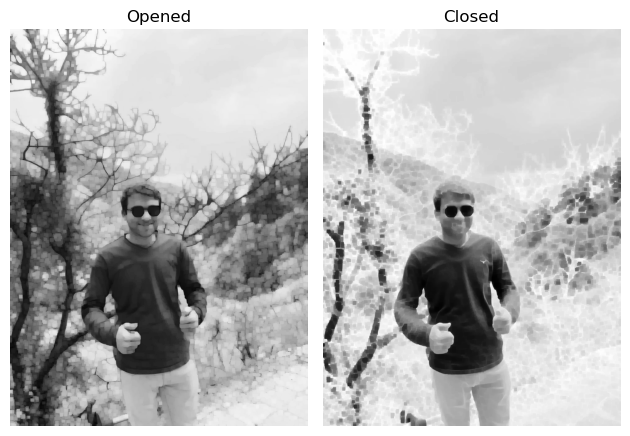

In [35]:
kernel = np.ones((9, 9), np.uint8)
opened_image = cv2.morphologyEx(img0g, cv2.MORPH_OPEN, kernel)
closed_image = cv2.morphologyEx(img0g, cv2.MORPH_CLOSE, kernel)
plt.subplot(1, 2, 1)
plt.imshow(opened_image, cmap = "gray")
plt.title("Opened")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(closed_image, cmap = "gray")
plt.title("Closed")
plt.axis("off")
plt.tight_layout()

# Image Thresholding

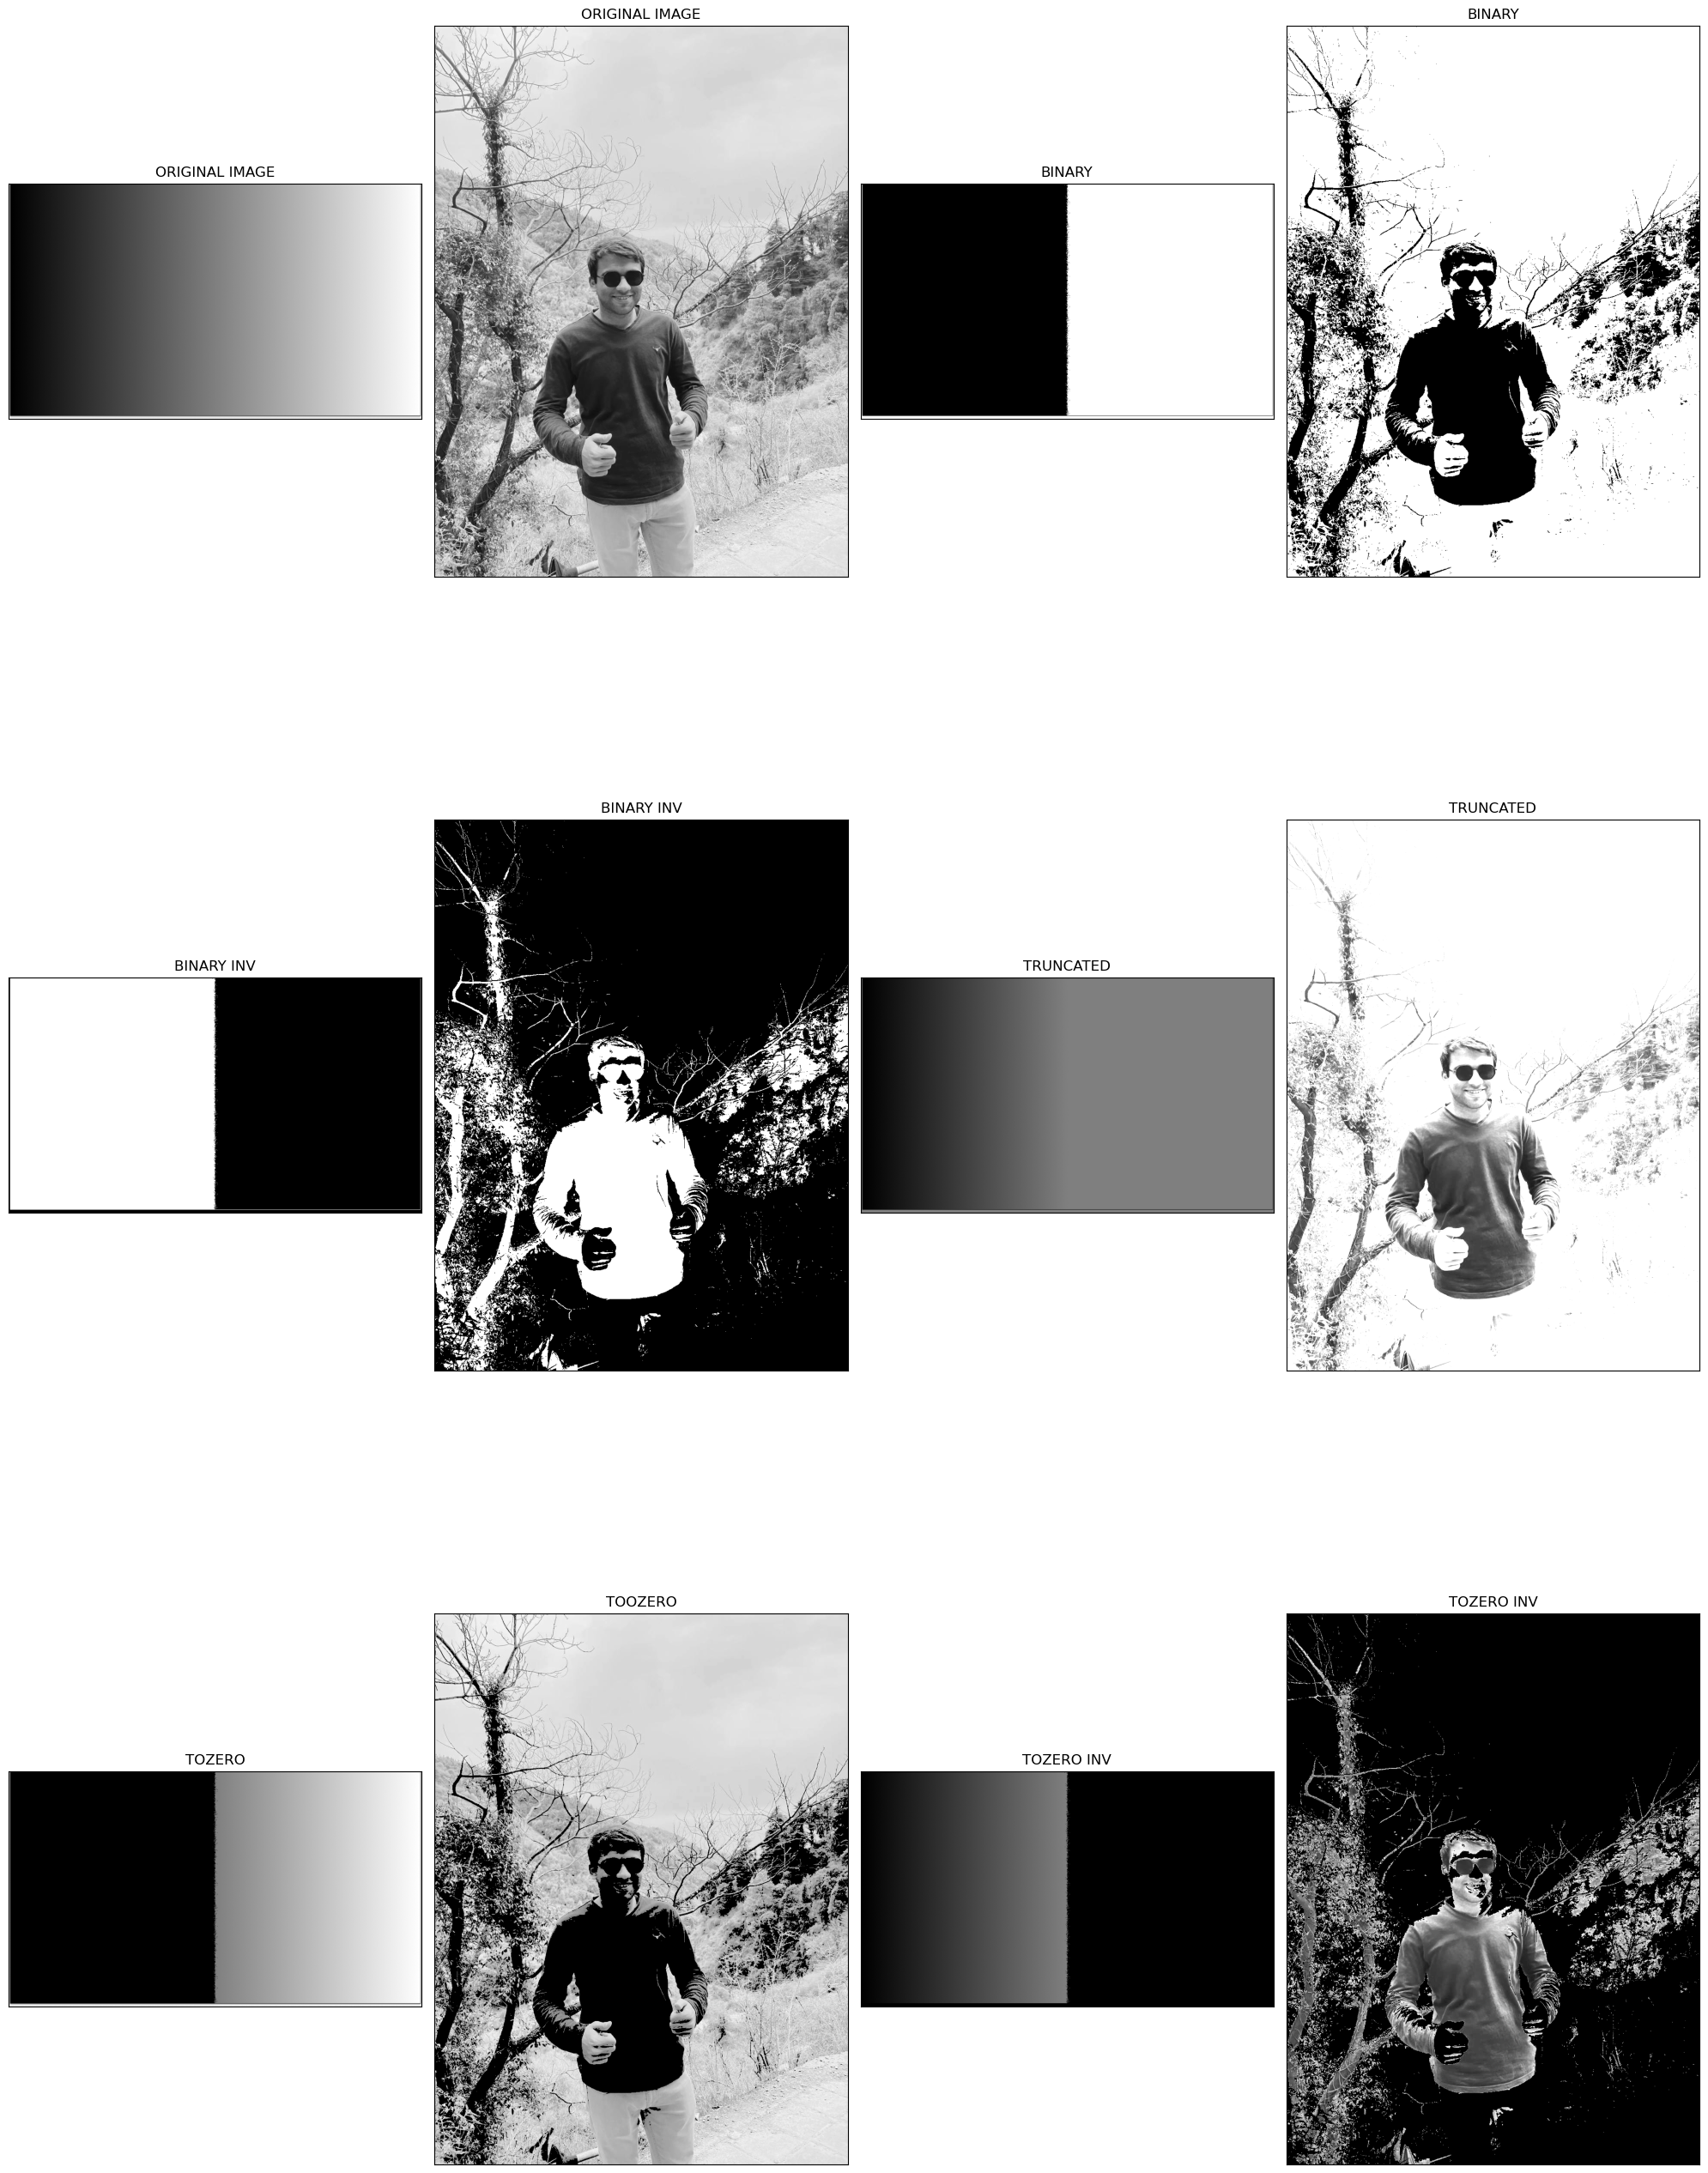

In [40]:
img1 = cv2.imread("./gradient.jpg")
img2 = img0g

ret, thresh1 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img1, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img1, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img1, 127, 255, cv2.THRESH_TOZERO_INV)


ret, thresh6 = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY)
ret, thresh7 = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh8 = cv2.threshold(img2, 127, 255, cv2.THRESH_TRUNC)
ret, thresh9 = cv2.threshold(img2, 127, 255, cv2.THRESH_TOZERO)
ret, thresh10 = cv2.threshold(img2, 127, 255, cv2.THRESH_TOZERO_INV)
titles = ['ORIGINAL IMAGE', 'ORIGINAL IMAGE', 'BINARY', 'BINARY', 'BINARY INV', 'BINARY INV', 'TRUNCATED', 'TRUNCATED', 'TOZERO', 'TOOZERO', 'TOZERO INV', 'TOZERO INV']
images = [img1, img2, thresh1, thresh6, thresh2, thresh7, thresh3, thresh8, thresh4, thresh9, thresh5, thresh10]
plt.figure(figsize = (20, 30))
for i in range(12):
    plt.subplot(3,4,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([ ]), plt.yticks([ ])
plt.tight_layout()